In [1]:
!pip install scikit-learn

In [2]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

## Data exploration

In [3]:
# Load the dataset
data = pd.read_csv("mobile_data.csv")

#### Display basic information of Dataset

In [4]:

print(data.head())


   Unnamed: 0            Model        Colour  Memory  RAM  Battery_  \
0           0  Infinix SMART 7   Night Black      64    4      6000   
1           1  Infinix SMART 7    Azure Blue      64    4      6000   
2           2     MOTOROLA G32  Mineral Gray     128    8      5000   
3           3         POCO C50    Royal Blue      32    2      5000   
4           4  Infinix HOT 30i      Marigold     128    8      5000   

  Rear Camera Front Camera  AI Lens  Mobile Height  \
0        13MP          5MP        1          16.76   
1        13MP          5MP        1          16.76   
2        50MP         16MP        0          16.64   
3         8MP          5MP        0          16.56   
4        50MP          5MP        1          16.76   

                   Processor_   Prize  
0  Unisoc Spreadtrum SC9863A1   7,299  
1  Unisoc Spreadtrum SC9863A1   7,299  
2     Qualcomm Snapdragon 680  11,999  
3          Mediatek Helio A22   5,649  
4                         G37   8,999  


In [5]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB
None


In [6]:
print(data.describe())

       Unnamed: 0      Memory         RAM     Battery_     AI Lens  \
count  541.000000  541.000000  541.000000   541.000000  541.000000   
mean   289.711645  110.550832    5.397412  4871.587800    0.062847   
std    182.359185   60.600694    1.984923   780.148862    0.242911   
min      0.000000   16.000000    2.000000   800.000000    0.000000   
25%    135.000000   64.000000    4.000000  5000.000000    0.000000   
50%    273.000000  128.000000    6.000000  5000.000000    0.000000   
75%    434.000000  128.000000    8.000000  5000.000000    0.000000   
max    642.000000  256.000000    8.000000  7000.000000    1.000000   

       Mobile Height  
count     541.000000  
mean       16.431201  
std         2.523553  
min         4.500000  
25%        16.510000  
50%        16.710000  
75%        16.940000  
max        41.940000  


### Checked and Handled the missing value in dataset


In [7]:
missval = data.isnull().sum()

missval

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

## There is no missing valuse

In [8]:

# Convert categorical variables to numerical using one-hot encoding
data1 = pd.get_dummies(data, columns=["Model", "Colour", "Rear Camera", "Front Camera", "Processor_"])

print(data1)


     Unnamed: 0  Memory  RAM  Battery_  AI Lens  Mobile Height   Prize  \
0             0      64    4      6000        1          16.76   7,299   
1             1      64    4      6000        1          16.76   7,299   
2             2     128    8      5000        0          16.64  11,999   
3             3      32    2      5000        0          16.56   5,649   
4             4     128    8      5000        1          16.76   8,999   
..          ...     ...  ...       ...      ...            ...     ...   
536         637     256    8      3900        0          15.49  79,999   
537         638      32    2      3100        0          12.70   5,998   
538         639      64    4      5000        0          16.76   9,990   
539         641     128    8      5000        0          16.26  38,999   
540         642     128    4      5000        0          16.66  15,999   

     Model_APPLE iPhone 11  Model_APPLE iPhone 12  Model_APPLE iPhone 14 Plus  \
0                    False    

## Memory Distribution

In [9]:

# Distribution of Memory

memory = data['Memory'].value_counts()

# Distribution of RAM

RAM = data['RAM'].value_counts()

# Distribution of Prize

prize = data['Prize'].value_counts()



In [10]:
memory


Memory
128    259
64     169
256     55
32      52
16       6
Name: count, dtype: int64

In [11]:
RAM

RAM
4    186
8    157
6    121
3     40
2     37
Name: count, dtype: int64

In [12]:
prize

Prize
15,999    23
9,999     22
16,999    21
8,999     20
23,999    19
          ..
20,998     1
29,499     1
8,495      1
8,449      1
38,999     1
Name: count, Length: 158, dtype: int64

In [17]:
import csv

def remove_commas(data, data_new):
    with open(data, 'r') as file_in, open(data_new, 'w', newline='') as file_out:
        reader = csv.reader(file_in)
        writer = csv.writer(file_out)
        for row in reader:
            cleaned_row = [value.replace(',', '') if isinstance(value, str) else value for value in row]
            writer.writerow(cleaned_row)

input_file = 'mobile_data.csv'  # input file name
output_file = 'mobile_data_new.csv'  # desired output file name

remove_commas(input_file, output_file)


In [19]:
data_new= pd.read_csv("mobile_data_new.csv")

In [22]:
data_new.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


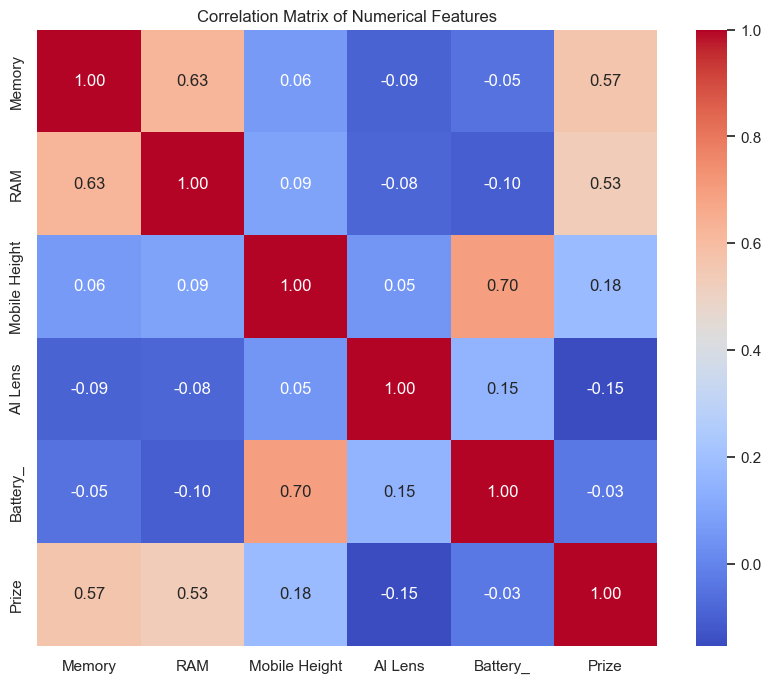

In [21]:

# Creating a correlation matrix
correlation_matrix = data_new[['Memory', 'RAM', 'Mobile Height','AI Lens', 'Battery_','Prize']].corr()


# Setting up the visualization style

sns.set(style='whitegrid')

# Plotting a heatmap for correlation matrix

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [ ]:
#correlation analysis
# Exclude non-numeric columns from correlation analysis
numeric_columns = data.select_dtypes(include=[np.number]).columns
correlation_matrix = data[numeric_columns].corr()
price_correlation = correlation_matrix['Memory'].sort_values(ascending=False)
print(price_correlation)



Memory           1.000000
RAM              0.625284
Unnamed: 0       0.120579
Mobile Height    0.063163
Prize            0.014395
Battery_        -0.053210
AI Lens         -0.094442
Name: Memory, dtype: float64


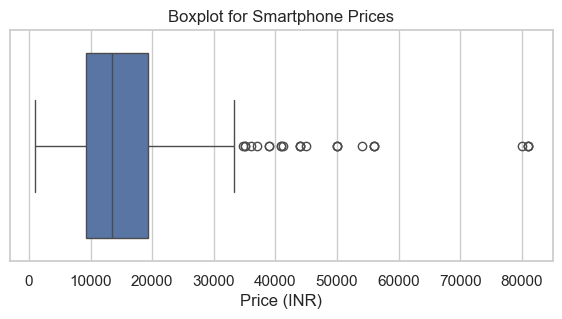

In [24]:
# Plotting a boxlplot for the 'Prize' column to check for outliers

sns.set(style="whitegrid")

plt.figure(figsize=(7,3))
sns.boxplot(x=data_new['Prize'])
plt.title('Boxplot for Smartphone Prices')
plt.xlabel('Price (INR)')
plt.show()

# Some more data exploration


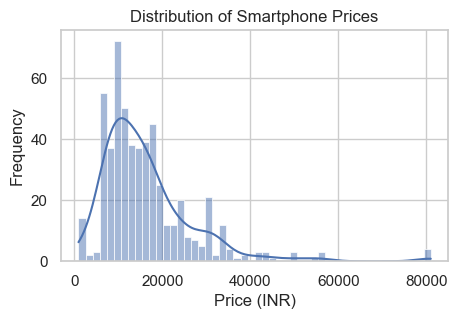

In [25]:

# Visualizing the distribution of Prize

plt.figure(figsize=(5,3))
sns.histplot(data_new['Prize'], bins=50, kde=True)
plt.title("Distribution of Smartphone Prices")
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.show()




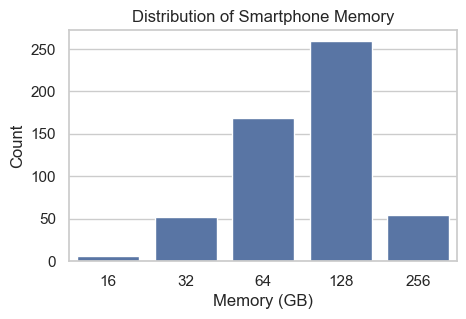

In [26]:
# Visualizing the distribution of Memory

plt.figure(figsize=(5,3))
sns.countplot(x='Memory', data=data_new)
plt.title('Distribution of Smartphone Memory')
plt.xlabel('Memory (GB)')
plt.ylabel('Count')
plt.show()



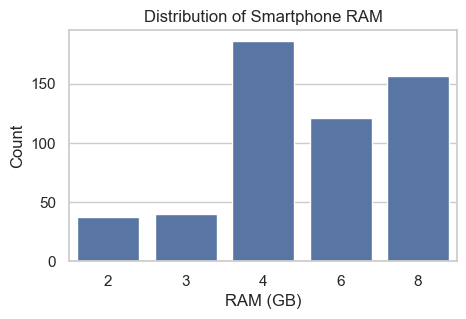

In [27]:
# Visualizing the distribution of RAM

plt.figure(figsize=(5,3))
sns.countplot(x='RAM', data=data_new)
plt.title('Distribution of Smartphone RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Count')
plt.show()



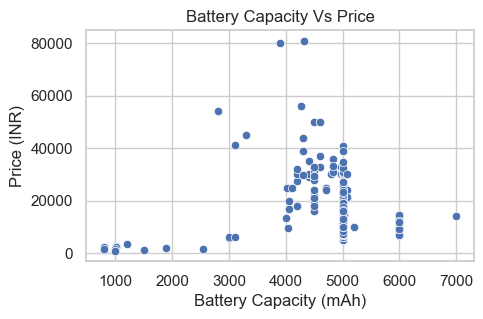

In [28]:
# Battery Capacity Vs Price scatter plot

plt.figure(figsize=(5,3))
sns.scatterplot(x='Battery_', y='Prize', data=data_new)
plt.title('Battery Capacity Vs Price')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Price (INR)')
plt.show()

### Data Preprocessing

In [ ]:
# Drop unnecessary columns
# The "Unnamed: 0" column seems redundant as it just replicates the index
# We can consider dropping it for analysis

data2 = data.drop("Unnamed: 0", axis = 1)
data2

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7.299
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7.299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11.999
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5.649
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8.999
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,79.999
537,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,5.998
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,9.990
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core",38.999


In [ ]:
missval

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

Since there are no any missing values, will move further for Handling The Outliers

In [ ]:
# Let's consider handling outliers in the 'Prize' column

q1 = data2['Prize'].quantile(0.25)
q3 = data2['Prize'].quantile(0.75)

iqr = q3 - q1

lower_fence = q1 - 1.5*iqr
higher_fence = q3 + 1.5*iqr

# Replacing outliers with median values

data2['Prize'] = data2['Prize'].apply(lambda x : data2['Prize'].median() if x < lower_fence or x > higher_fence else x)


In [ ]:
data1= data2.copy()
data1

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7.299
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7.299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11.999
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5.649
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8.999
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,13.999
537,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,5.998
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,9.990
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core",13.999


In [ ]:
# Convert categorical variables into numerical format (One-Hot Encoding)

Categorical_cols = data1.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data1, columns=Categorical_cols)

In [ ]:
data_encoded

,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize,Model_APPLE iPhone 11,Model_APPLE iPhone 12,Model_APPLE iPhone 14 Plus,Model_Google Pixel 6a,...,Processor__Unisoc Spreadtrum SC9863A1,Processor__Unisoc T606,Processor__Unisoc T610,Processor__Unisoc T612,Processor__Unisoc T612 processor,Processor__Unisoc T616,Processor__Unisoc Tiger T612 (12 nm),Processor__Unisoc Tiger T616,Processor__ios,Processor__snapdragon 888
0,64,4,6000,1,16.76,7.299,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,64,4,6000,1,16.76,7.299,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,128,8,5000,0,16.64,11.999,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,32,2,5000,0,16.56,5.649,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,128,8,5000,1,16.76,8.999,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,256,8,3900,0,15.49,13.999,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
537,32,2,3100,0,12.70,5.998,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
538,64,4,5000,0,16.76,9.990,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
539,128,8,5000,0,16.26,13.999,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


There are lots of features that would be tedious to handle, so We will use Ordinal Encoding to Convert categorical variables into numerical format.


For this we have to import OrdinalEncoder first.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Selecting the columns suitable for odinal encoding
categorical_columns = ['Colour', 'Rear Camera', 'Front Camera', 'Processor_']

# Initializing the ordinal encoder
encoder = OrdinalEncoder()

# Fitting and transforming the data
data1[categorical_columns] = encoder.fit_transform(data1[categorical_columns])

# Display the first few rows of the updated datset
data1.head()


,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,159.0,64,4,6000,3.0,10.0,1,16.76,113.0,7.299
1,Infinix SMART 7,20.0,64,4,6000,3.0,10.0,1,16.76,113.0,7.299
2,MOTOROLA G32,149.0,128,8,5000,10.0,4.0,0,16.64,75.0,11.999
3,POCO C50,201.0,32,2,5000,13.0,10.0,0,16.56,56.0,5.649
4,Infinix HOT 30i,130.0,128,8,5000,10.0,10.0,1,16.76,14.0,8.999


Each unique category in these columns has been assigned a unique integer.

The model column contains the names of the model, which are typically treated as nominal data. we apply this on model column like other to convert it into the numerical format for easier handling.

In [ ]:
# Applying ordinal encoding to the 'Model' column

data1['Model'] = encoder.fit_transform(data1[['Model']])

data1

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,23.0,159.0,64,4,6000,3.0,10.0,1,16.76,113.0,7.299
1,23.0,20.0,64,4,6000,3.0,10.0,1,16.76,113.0,7.299
2,37.0,149.0,128,8,5000,10.0,4.0,0,16.64,75.0,11.999
3,69.0,201.0,32,2,5000,13.0,10.0,0,16.56,56.0,5.649
4,12.0,130.0,128,8,5000,10.0,10.0,1,16.76,14.0,8.999
...,...,...,...,...,...,...,...,...,...,...,...
536,118.0,49.0,256,8,3900,10.0,2.0,0,15.49,89.0,13.999
537,32.0,52.0,32,2,3100,11.0,6.0,0,12.70,68.0,5.998
538,123.0,259.0,64,4,5000,10.0,12.0,0,16.76,35.0,9.990
539,110.0,17.0,128,8,5000,10.0,7.0,0,16.26,11.0,13.999


Now model column assigned a integer and unique value

In [ ]:
# Label encoder
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders for the categorical variables
label_encoders = {col:LabelEncoder() for col in ['Model', 'Colour', 'Rear Camera', 'Front Camera', 'Processor_']}

# Apply label encoding to each categorical column
for col, encoder in label_encoders.items():
    data2[col] = encoder.fit_transform(data2[col])


In [ ]:
data2

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,23,159,64,4,6000,3,10,1,16.76,113,7.299
1,23,20,64,4,6000,3,10,1,16.76,113,7.299
2,37,149,128,8,5000,10,4,0,16.64,75,11.999
3,69,201,32,2,5000,13,10,0,16.56,56,5.649
4,12,130,128,8,5000,10,10,1,16.76,14,8.999
...,...,...,...,...,...,...,...,...,...,...,...
536,118,49,256,8,3900,10,2,0,15.49,89,13.999
537,32,52,32,2,3100,11,6,0,12.70,68,5.998
538,123,259,64,4,5000,10,12,0,16.76,35,9.990
539,110,17,128,8,5000,10,7,0,16.26,11,13.999


From both encoder we are getting the same output

#### Feature Extraction

In [ ]:
# Calculating the correlation of each feature with the price

price_corr = data2.corr()['Prize'].sort_values(ascending=False)

price_corr

Prize            1.000000
Memory           0.668542
RAM              0.637932
Mobile Height    0.240364
Model            0.122087
Battery_         0.095456
Colour           0.054110
Rear Camera      0.050791
Processor_      -0.093886
AI Lens         -0.175363
Front Camera    -0.391891
Name: Prize, dtype: float64

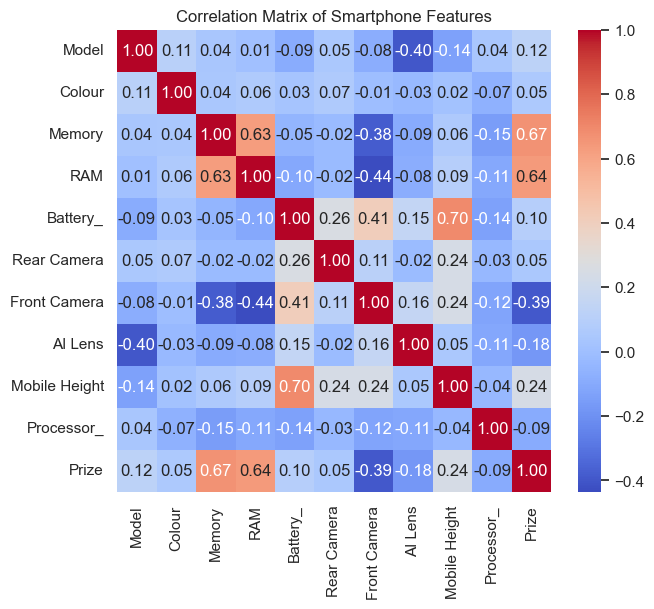

In [ ]:
# Creating a correlation matrix

correlation_matrix = data2.corr()

# Setting up the visualization style

sns.set(style='whitegrid')

# Plotting a heatmap for correlation matrix

plt.figure(figsize=(7,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Smartphone Features")
plt.show()

In [ ]:
from sklearn.decomposition import PCA

# Standardization of the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data2)

# Applying PCA
pca = PCA(n_components=2)  # Using 2 components for visualization purposes
principal_components = pca.fit_transform(scaled_data)

# Creating a DataFrame with the principal components
pca_data = pd.DataFrame(data=principal_components, columns = ['Principal Component 1', 'Principal Component 2'])

pca_data.head()

,Principal Component 1,Principal Component 2
0,-2.622779,-0.671870
1,-2.723233,-0.569813
2,0.849649,-0.197132
3,-2.456320,-0.066205
4,-0.759791,-1.550978


We applied Principal Components analysis (PCA) to reduce to data set into two principal component. These components are linear combinations of our original features and are designed to capture as much of the variance in the data as possible.

#### Visualizing these components and Exploring the explained variance ratio

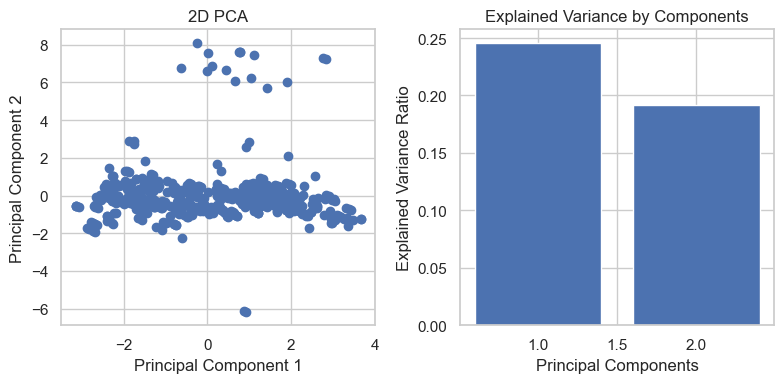

array([0.24526862, 0.19172485])

In [ ]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plotting the principal components
plt.figure(figsize=(8, 4))

# Scatter plot of the principal components
plt.subplot(1, 2, 1)
plt.scatter(pca_data['Principal Component 1'], pca_data['Principal Component 2'])
plt.title('2D PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Bar plot of the explained variance
plt.subplot(1, 2, 2)
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.title('Explained Variance by Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')

plt.tight_layout()
plt.show()

explained_variance


the Visualizations and Explained variance ratio tell us:

2D PCA Scatter plot :  This gives a visual representation of where each data point lies in the space spanned by the two main components.

Explained variance ratio :  It Shows the proportion of the variance explained by each of the two principal components. There are more complexities in the dataset that might require more components for a comprehensive understanding.

## Linear Regression


In [ ]:
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from math import sqrt



In [ ]:
# Splitting the dataset into features (X) and the target variable (y)

X = pca_data
y = data2['Prize']

# Splitting into training and testing sets

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model

linear_model = LinearRegression()

# Train the model

linear_model.fit(X_train, y_train)

# Predict on the test set

y_pred = linear_model.predict(x_test)

# Calculate performance metrics

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
mse, r2

(9.016614086065868, 0.8100766335993731)

The linear regression model is trained and evaluated on the test set, The performance metrices are as :-

1. Mean Squared Error (MSE) : Approximately 9.0166140860

2. R2 score :  Approximately 0.81


MSE :- This value indicates the average squared difference between the actual and the predicted value.

R2 :- This score represents the proportion of variance in the dependent variable that is predicatable from the independent variable. Here, an R2 of 0.81 means that about 81% of the variance in the 'Prize' can be predicted from the PCA components. This is a relatively strong score, suggesting that the model has good predicting power.

### Model Evaluation

In [ ]:
# Evaluating the performance metrics

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

mae, rmse


(2.0896879902628287, 3.0027677376157262)

Observations :- 
MAE : On average, the model's predictions are about 2.08968799 units, away from the actual phone price.

EMSE : This is a more sensitive measure to larger errors, an RSME of 3.0027677 suggests that the standard deviation of the prediction error is around this value.

#### Using Random Forest

In [ ]:
# Import necessary packages first

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# Creating a pipeline that first scales the features and then apply Random Forest

pipeline = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))

# Training the pipeline on the training data

pipeline.fit(X_train, y_train)

# Predicting on the test set

y_pred_rf = pipeline.predict(x_test)

# Calculate performance metrics for Random Forest

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Perform cross-validation

cv_scores = cross_val_score(pipeline, X, y, cv=5)


In [ ]:
mse_rf, rmse_rf, r2_rf, cv_scores.mean()

(8.569311382976135, 2.9273386177509657, 0.8194984891163113, 0.7154891375260009)

#### using Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree model

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions and evaluation for Decision Tree

dt_predictions = dt_model.predict(x_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

In [ ]:
dt_mse, dt_r2

(16.318134825688073, 0.6562795002767798)

#### Using Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting model

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions and evaliation for Gradient Boosting

gb_predictions = gb_model.predict(x_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

In [ ]:
gb_mse, gb_r2

(8.72801366754575, 0.8161556298286424)

### Feature Importance Analysis

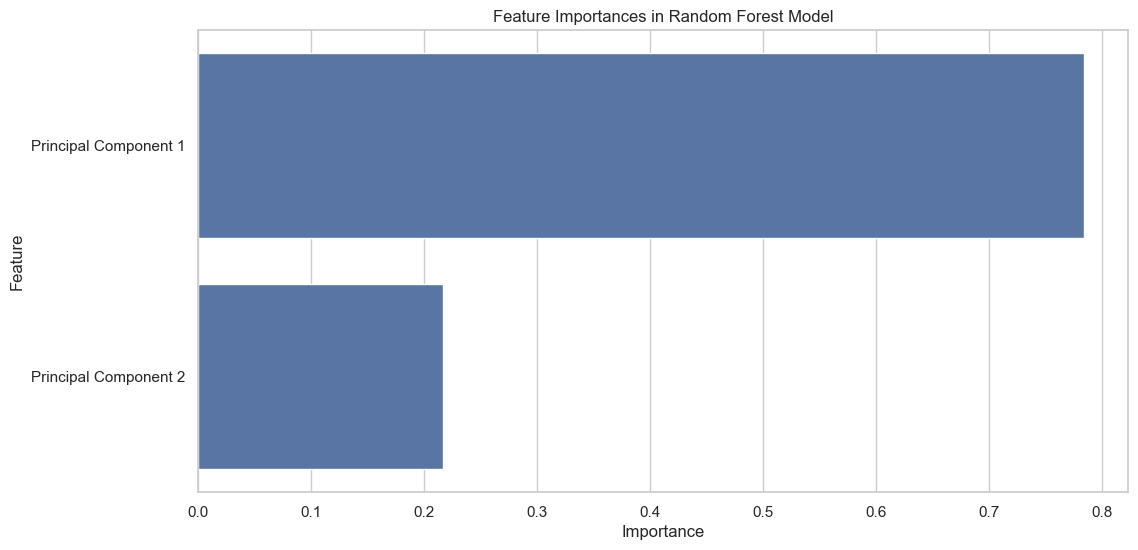

,Feature,Importance
0,Principal Component 1,0.783711
1,Principal Component 2,0.216289


In [ ]:
# Extracting feature importance from the Random Forest model

feature_importances = pipeline.named_steps['randomforestregressor'].feature_importances_

# Creating a DataFrame for better visualization

features_data = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by="Importance", ascending=False)

# Plotting the feature importance

plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y="Feature", data=features_data)
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

features_data

Observations :-

PC1(Principal Component1) : This component is the most important feature, with an importance score of approximately 0.783. It indicates that the first principal component captures the most significant variance and patterns in the data.

PC2(Principal Component2) : The second principal component is also valuable but less so than the first, with an importance score of about 0.216.

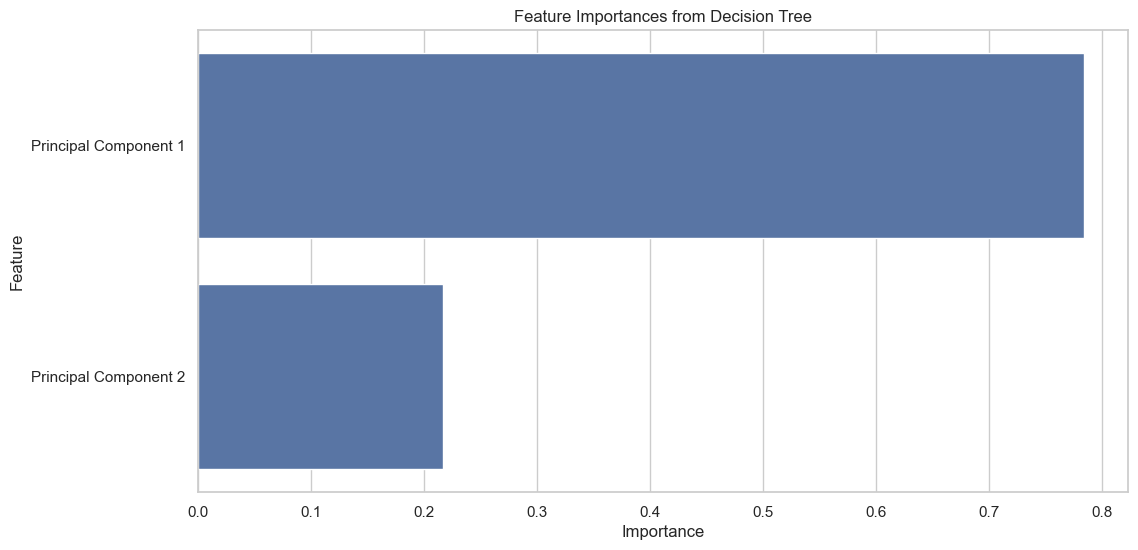

,Feature,Importance
0,Principal Component 1,0.794375
1,Principal Component 2,0.205625


In [ ]:
# Feature importance from the Decision Tree

dt_feature_importance = dt_model.feature_importances_

# Creating a DataFrame for better visualization

dt_features_data = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_feature_importance
}).sort_values(by="Importance", ascending=False)

# Plotting the feature importance

plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y="Feature", data=features_data)
plt.title('Feature Importances from Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

dt_features_data

Observations :-

PC1(Principal Component1) : This component is the most important feature, with an importance score of approximately 0.7943. It indicates that the first principal component captures the most significant variance and patterns in the data.

PC2(Principal Component2) : The second is also valuable but less so than the first, with an importance score of about 0.2056.

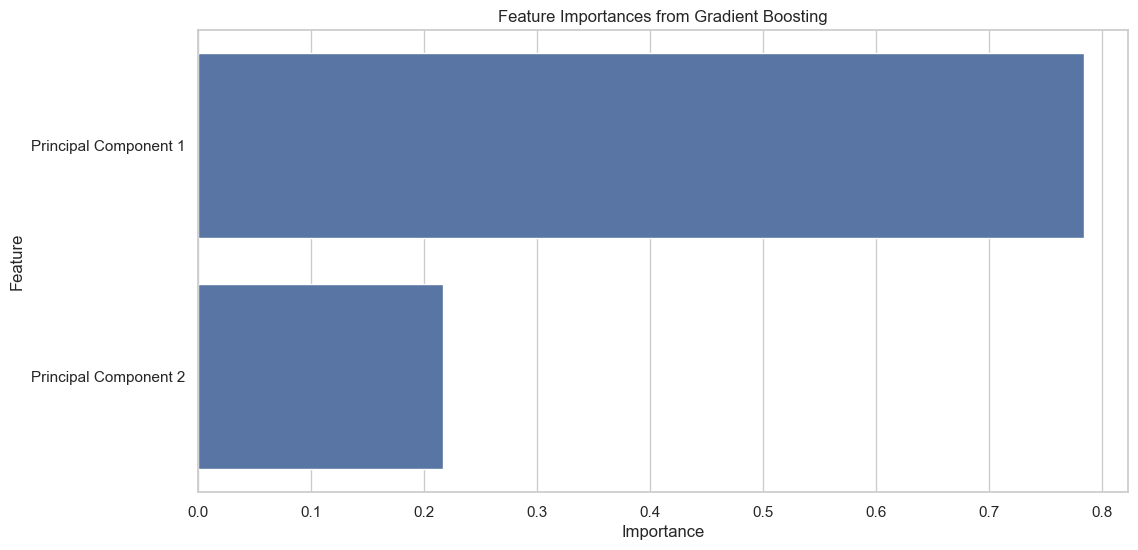

,Feature,Importance
0,Principal Component 1,0.79724
1,Principal Component 2,0.20276


In [ ]:
# Feature importance from the Gradient boosting

gb_feature_importance = gb_model.feature_importances_

# Creating a DataFrame for better visualization

gb_features_data = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_feature_importance
}).sort_values(by="Importance", ascending=False)

# Plotting the feature importance

plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y="Feature", data=features_data)
plt.title('Feature Importances from Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

gb_features_data

Observations :-

PC1(Principal Component1) : This component is the most important feature, with an importance score of approximately 0.797. It indicates that the first principal component captures the most significant variance and patterns in the data.

PC2(Principal Component2) : The second is also valuable but less so than the first, with an importance score of about 0.202.